# Regularization

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 

In [2]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#Load the data
boston_pd = pd.DataFrame(boston_dataset.data) #converting data to df
boston_pd.columns = boston_dataset.feature_names #adding column names 
boston_pd_target = np.asarray(boston_dataset.target) #converting Y variable to array in a new df
boston_pd['House Price'] = pd.Series(boston_pd_target) #adding Y variable to original dataset in array format

In [4]:
print(boston_pd.shape)
boston_pd.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# divide into X and Y varaiable
X = boston_pd.iloc[:, :-1] 
Y = boston_pd.iloc[:, -1] 

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#splitting data into train-test 
x_train , x_test , y_train , y_test = train_test_split(boston_pd.iloc[:, :-1],boston_pd.iloc[:, -1],test_size=0.25)
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(379, 13) (379,) (127, 13) (127,)


### Multi-Linear Regression(OLS)

In [8]:
# Applying and fit multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 

# calculating Mean Squared Error (MSE) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Co-efficient Estimate'] = pd.Series(lreg.coef_) 
lreg_coefficient 

Mean squared Error on test set :  33.912733682844795


,Columns,Co-efficient Estimate
0,CRIM,-0.112015
1,ZN,0.032818
2,INDUS,0.000249
3,CHAS,2.975246
4,NOX,-13.633159
5,RM,4.756392
6,AGE,-0.011687
7,DIS,-1.180999
8,RAD,0.247967
9,TAX,-0.009443


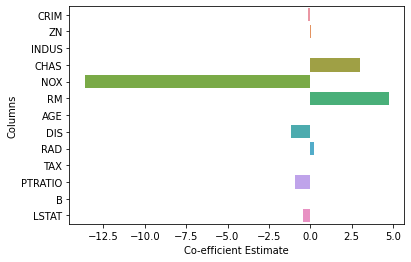

In [9]:
#co-efficients contribution visualization
sns.barplot(x='Co-efficient Estimate', y='Columns', data=lreg_coefficient);

### Ridge Regularization

In [10]:
# Train,fit and predict the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print("Mean squared Error on test set : ",mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Co-efficient Estimate'] = pd.Series(ridgeR.coef_) 
ridge_coefficient

Mean squared Error on test set :  34.556209838224305


,Columns,Co-efficient Estimate
0,CRIM,-0.110203
1,ZN,0.033232
2,INDUS,-0.024000
3,CHAS,2.796420
4,NOX,-7.566153
5,RM,4.776850
6,AGE,-0.017405
7,DIS,-1.091598
8,RAD,0.234847
9,TAX,-0.009932


### Lasso Regularization

In [11]:
# Train,fit and predict the model 
lasso = Lasso(alpha = 0.05) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error_lasso = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set :", mean_squared_error_lasso) 

# get lasso co-efficient and print them 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Co-efficient Estimate'] = pd.Series(lasso.coef_) 
lasso_coeff

Mean squared error on test set : 35.53529806258062


,Columns,Co-efficient Estimate
0,CRIM,-0.106593
1,ZN,0.033458
2,INDUS,-0.046521
3,CHAS,2.057262
4,NOX,-0.000000
5,RM,4.759153
6,AGE,-0.022656
7,DIS,-0.950827
8,RAD,0.219260
9,TAX,-0.010724


### Elastic Net 

In [12]:
# Train,fit and predict the model 
e_net = ElasticNet(alpha = .4,l1_ratio=.5) #defualt value of l1 is 0.5
e_net.fit(x_train, y_train) 
y_pred_elastic = e_net.predict(x_test)

# calculate mean square error  
mean_squared_error_elastic = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error_elastic)

# get elastic co-efficient and print them 
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Co-efficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff

Mean Squared Error on test set 33.63621554326217


,Columns,Co-efficient Estimate
0,CRIM,-0.098852
1,ZN,0.042356
2,INDUS,-0.043477
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,2.347187
6,AGE,-0.000342
7,DIS,-0.880777
8,RAD,0.267799
9,TAX,-0.012834


### Conclusion

In [13]:
print("MSE of OLS is : ", mean_squared_error)
print("MSE of Ridge is : ",mean_squared_error_ridge)
print("MSE of Lasso is :", mean_squared_error_lasso)
print("MSE of Elastic Net is :", mean_squared_error_elastic)

MSE of OLS is :  33.912733682844795
MSE of Ridge is :  34.556209838224305
MSE of Lasso is : 35.53529806258062
MSE of Elastic Net is : 33.63621554326217


Since it is Mean Squared Error(MSE) so it is preferred to choose with less value.
To choose the Optimal Value of Regularization parametres can use-RidgeCV,LassoCV,ElasticCV.it has inbuilt Cross-Validation similar to GridSearchCV.